https://youtu.be/JWyBkF9vIvo?si=VLtuDVKDZyNsITKM semana 7 (Arbol de regresión)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

X_level= pd.Series([1,2,3,4,5,6,7,8,9,10])#nivel
y_salary = pd.Series ([45,50,60,80,111,150,200,300,500,1000])#salario que cobran por cada nivel

In [2]:
X_level

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [3]:
y_salary

0      45
1      50
2      60
3      80
4     111
5     150
6     200
7     300
8     500
9    1000
dtype: int64

In [4]:
X_level = X_level.values.reshape(-1,1)
drtm =DecisionTreeRegressor(random_state = 0) 
drtm.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

In [5]:
X_level

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

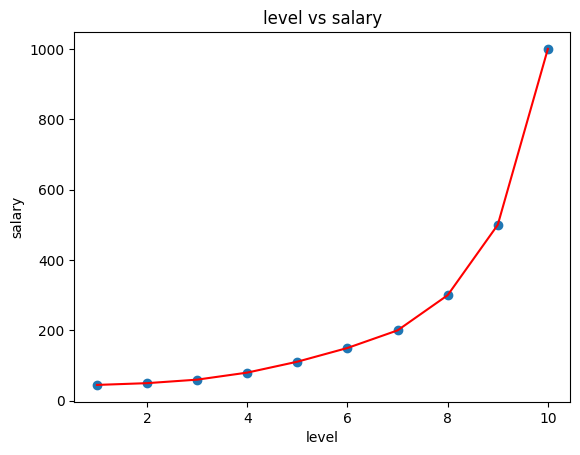

In [6]:
y_predict_salary = drtm.predict(X_level)
plt.plot(X_level, y_predict_salary, color = 'red')

plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.scatter(X_level, y_salary)
plt.show()

In [7]:
export_graphviz(drtm, out_file= 'tree.dot', feature_names= ['Level'])


para visualizar copiar el contenido de archivo .dot en la siguiente url

http://www.webgraphviz.com/?tab=map

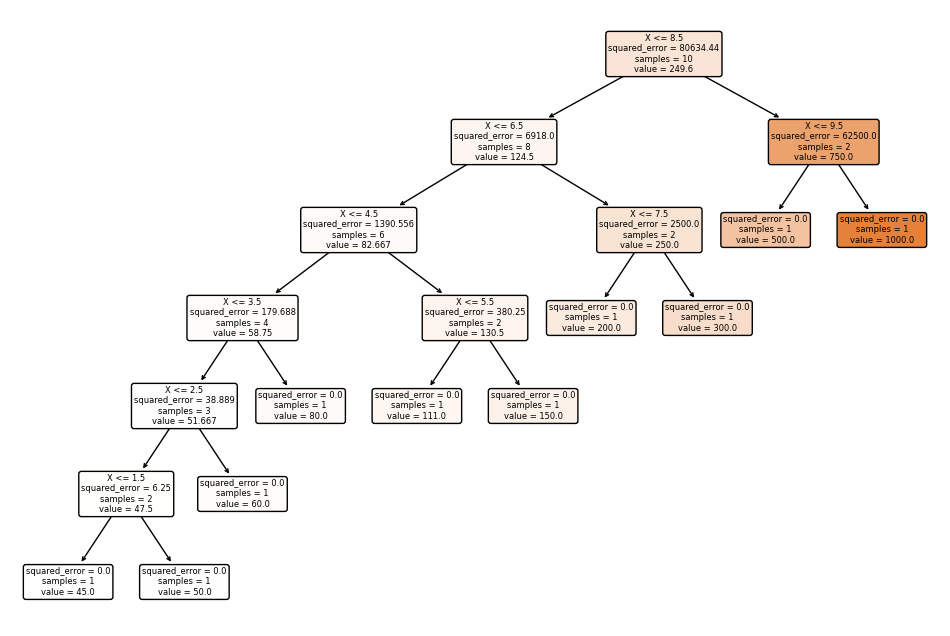

In [8]:
# Visualización del árbol
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(drtm, filled=True, feature_names=['X'], rounded=True)
plt.show()


# USANDO LA DATA DE CALIFORNIA DE SKLEARN

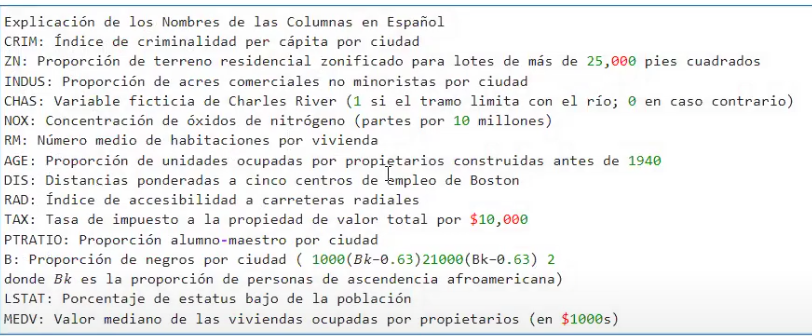

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.utils import Bunch

# Cargar el conjunto de datos y tomar una muestra
nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=nombres_columnas)
df = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\base de datos\housing.csv', header=None, delimiter=r"\s+", names=nombres_columnas)
print(df.head(5))

# Separar la columna 'MEDV' del DataFrame
X = df.drop('MEDV', axis=1).values  # X contiene todas las columnas excepto 'MEDV'
y = df['MEDV'].values  # y contiene la columna 'MEDV', esta es la variable objetivo

# Crear el Bunch, pasar de dataFrame a dataset
dataset = Bunch(data=X, target=y, feature_names=nombres_columnas[:-1], target_names=['MEDV'])



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
dataset #no es dataframe es dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
X_features= dataset.data
y_prices = dataset.target

In [13]:
#Entrenamiento
X_train, X_test, y_train, y_test =train_test_split(X_features, y_prices, test_size=0.2, random_state = 42)

In [14]:
dtrmBoston= DecisionTreeRegressor()
dtrmBoston.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_expected = y_test
y_predicted =dtrmBoston.predict(X_test)
print("The model performance for test set")
print("-- ---")
print('R2 score is {}'.format(metrics.r2_score(y_expected, y_predicted)))

The model performance for test set
-- ---
R2 score is 0.842267010315602


In [16]:
export_graphviz(dtrmBoston, out_file= 'treeB.dot', feature_names= dataset.feature_names)

para visualizar copiar el contenido de archivo .dot en la siguiente url

http://www.webgraphviz.com/?tab=map

In [17]:
y_predict =dtrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'Predicción': y_predict})
dfAP.head(10)

,Actual,Predicción
0,24.0,33.1
1,21.6,21.6
2,34.7,33.0
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,27.1


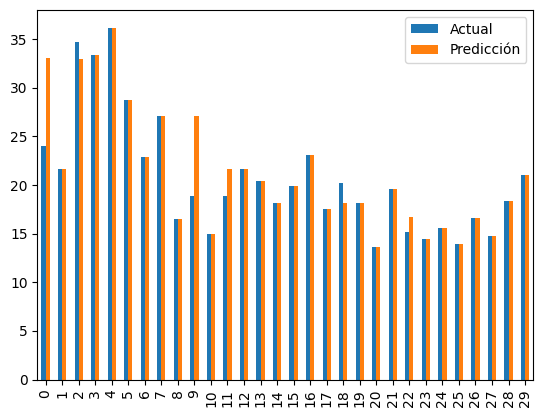

In [18]:
dfAP.head (30).plot(kind='bar')
plt.show()

In [19]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install graphviz


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

treeB = StringIO()
export_graphviz(dtrmBoston, out_file = treeB, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(treeB.getvalue())  
Image(graph.create_png())



InvocationException: GraphViz's executables not found